### Final TL6678

In [1]:
library(reshape2)
library(dplyr)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data <- read.table('/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/SComatic_new_ok/TL6678-GEX-genotypes/TL6678_malig_only_genotype_filter.tsv',
                  header=T)

In [3]:
data$Mut_inf <- paste(data$CHROM, data$Start, 
                      data$REF, data$ALT_expected, sep=":")

In [4]:
cast_data <- dcast(data, CB~Mut_inf)

Using Mut_inf as value column: use value.var to override.

Aggregation function missing: defaulting to length



In [5]:
mat <- matrix(nrow = nrow(cast_data), ncol = ncol(cast_data)-1, data = NA)
rownames(mat) <- cast_data$CB
colnames(mat) <- colnames(cast_data)[-1]

In [6]:
mat %>% head

,chr1:109091351:C:T,chr1:109738306:T:G,chr1:110895421:G:A,chr1:111182050:A:G,chr1:112703101:C:T,chr1:117059250:T:C,chr1:13714696:C:T,chr1:147083400:T:C,chr1:151107089:A:G,chr1:156817247:A:G,⋯,chr9:78031610:T:C,chr9:79608953:G:A,chrX:12975615:G:A,chrX:154352871:T:C,chrX:154379465:C:T,chrX:16789389:A:G,chrX:49073882:G:A,chrX:53081811:G:T,chrX:57121152:T:A,chrX:79171181:G:A
NHL_TCEL11348935_AAACCTGAGACCACGA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NHL_TCEL11348935_AAACCTGAGCAATATG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NHL_TCEL11348935_AAACCTGAGCCTTGAT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NHL_TCEL11348935_AAACCTGAGCGCTCCA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NHL_TCEL11348935_AAACCTGAGGATCGCA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NHL_TCEL11348935_AAACCTGAGGCCGAAT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
for (i in 1:nrow(data)) {
    if (data$Base_observed[i] == data$ALT_expected[i]) {
        mat[data$CB[i], data$Mut_inf[i]] <- 1
    } else if (data$Base_observed[i] == data$REF[i]) {
        mat[data$CB[i], data$Mut_inf[i]] <- 0
    }
}

In [8]:
filter_mut <- apply(mat, 2, function(x) sum(x==1, na.rm=T))
filter_genotype <- apply(mat, 2, function(x) sum(!is.na(x))/nrow(mat)*100)

In [9]:
which(filter_mut >= 50 & filter_genotype >= 2)

chr1:112703101:C:T chr13:21140666:G:A  chr17:3723319:G:A chr19:10105378:G:T 
                 5                 67                 98                116 
 chr2:55232815:C:T chr20:35742778:A:T chr22:41281076:C:G chr6:134994432:C:T 
               145                155                168                216 
 chr7:18495950:G:A 
               243

In [10]:
### filter mut mat
mat_sub <- mat[, which(filter_mut >= 50 & filter_genotype >= 2)]
#ll <- apply(mat_sub, 1, function(x) sum(x, na.rm = TRUE)
ll <- apply(mat_sub, 1, function(x) all(x %>% is.na))
mat_sub <- mat_sub[-which(ll), ]
mm <- apply(mat_sub, 1, function(x) any(x==1, na.rm=TRUE))   
mat_sub <- mat_sub[which(mm), ]
            
mat_sub %>% dim

[1] 1288    9

In [11]:
library(cultevo)
library(ape)

dist_row <- hammingdists(t(mat_sub))
dist_col <- hammingdists(mat_sub)


Attaching package: ‘ape’


The following object is masked from ‘package:cultevo’:

    mantel.test


The following object is masked from ‘package:dplyr’:

    where




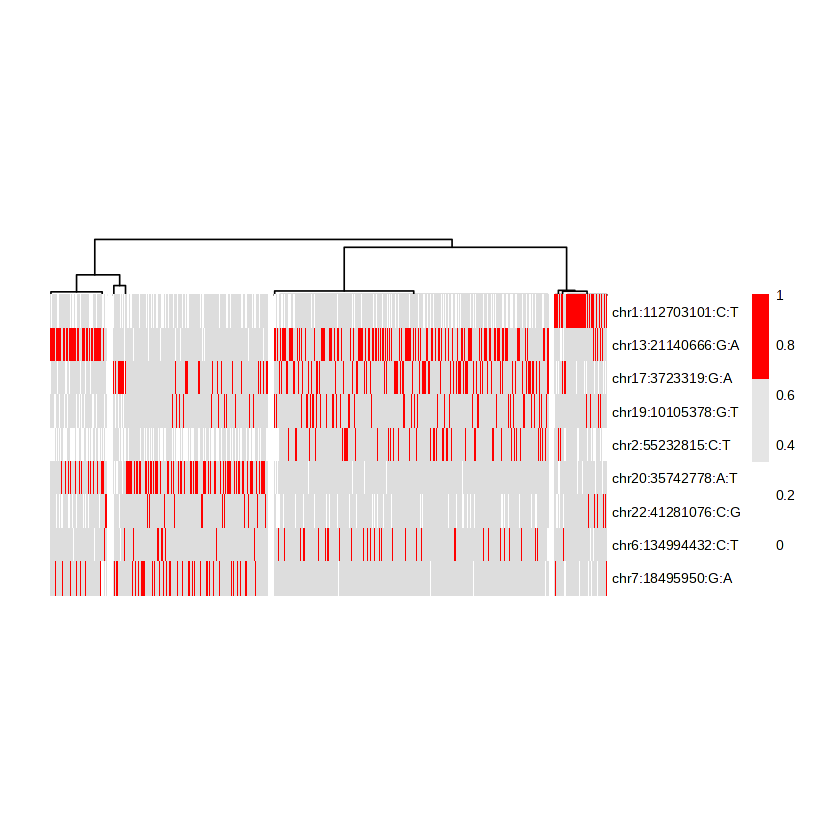

In [14]:
library(pheatmap)
library(RColorBrewer)

x <- pheatmap(t(mat_sub), cluster_cols=T, cluster_rows=F, 
              clustering_distance_rows= dist_row ,clustering_distance_cols=dist_col, 
              color=c("white", "grey90", "red"), 
              fontsize=8,treeheight_row=30,treeheight_col=30, 
              cellheight = 20,cellwidth = 0.25,show_rownames=T, 
              show_colnames=F,clustering_method = "ward.D", border_color = "NA", cutree_cols = 4)

In [ ]:
x <- pheatmap(t(mat_sub), cluster_cols=T, cluster_rows=F, 
              clustering_distance_rows= dist_row ,clustering_distance_cols=dist_col, 
              color=c("white", "grey90", "red"), 
              fontsize=8,treeheight_row=30,treeheight_col=30, 
              cellheight = 20,cellwidth = 0.2,show_rownames=T, 
              show_colnames=F,clustering_method = "ward.D", border_color = "NA", cutree_cols = 4, 
              filename = 'mutant_clones_TL6678.pdf')

In [15]:
tree_cut <- cutree(x$tree_col, k = 4)
sum(tree_cut==1)
sum(tree_cut==2)
sum(tree_cut==3)
sum(tree_cut==4)

[1] 658

[1] 370

[1] 135

[1] 125

In [16]:
hh <- cbind(mat_sub, cutree(x$tree_col, k = 4))
clust <- hh[,ncol(hh)]

In [78]:
write.table(clust, file="../Mutant_clone/TL6678_clone_clust_new.csv", quote=F, sep=",", col.names=T, row.names=T)